## Image Transformation on baboon.png (RGB)

#### Import the Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_image(image_1, image_2, title_1="Original", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1, cmap="gray" if len(image_1.shape)==2 else None)
    plt.title(title_1)
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(image_2, cmap="gray" if len(image_2.shape)==2 else None)
    plt.title(title_2)
    plt.axis("off")
    plt.show()

#### Load the RGB image baboon.png.

In [3]:
image = cv2.imread('baboon.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

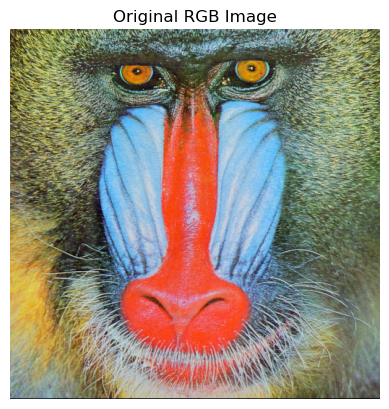

In [4]:
plt.imshow(image)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

#### Create and display histograms for each color channel (Red, Green, Blue).

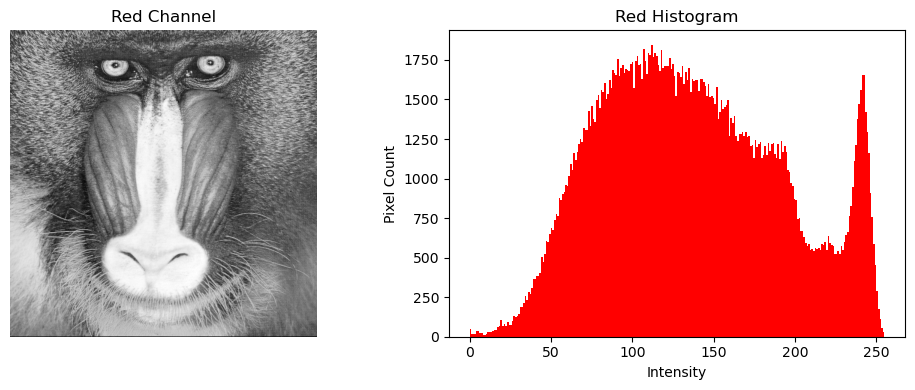

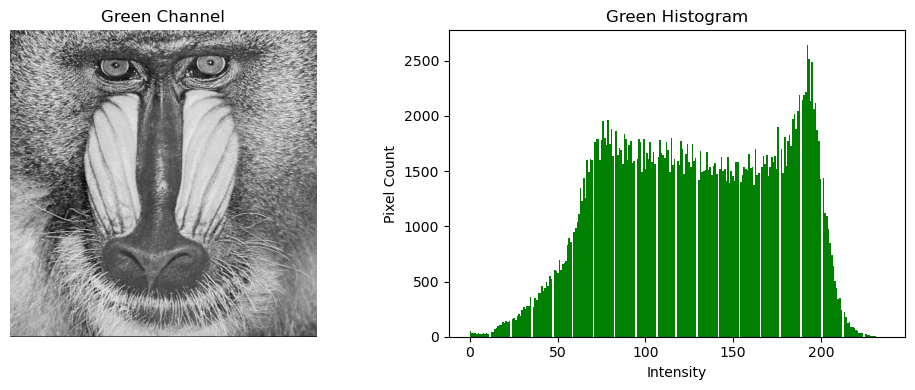

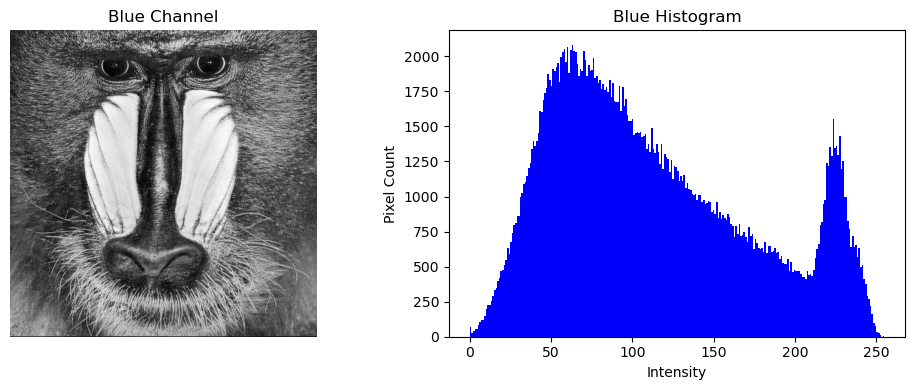

In [6]:
channels = ['Red', 'Green', 'Blue']
for i, color in enumerate(channels):
    plt.figure(figsize=(10, 4))

    # Show the channel image in grayscale
    plt.subplot(1, 2, 1)
    plt.imshow(image[:, :, i], cmap='gray')
    plt.title(f'{color} Channel')
    plt.axis('off')

    # Show the histogram
    plt.subplot(1, 2, 2)
    plt.hist(image[:, :, i].ravel(), bins=256, color=color.lower())
    plt.title(f'{color} Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')

    plt.tight_layout()
    plt.show()

#### Apply intensity transformations to enhance image contrast and brightness.

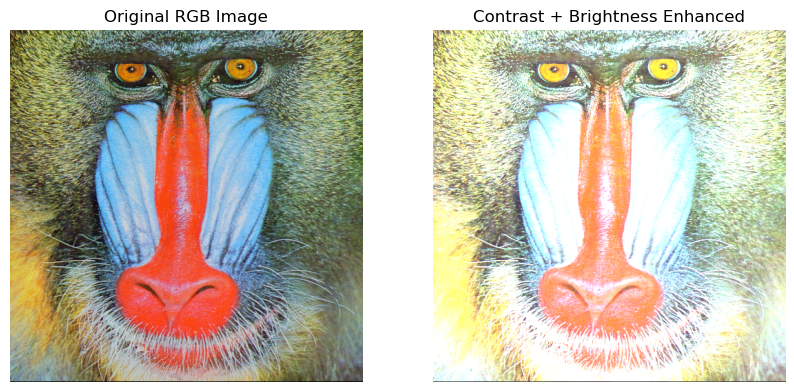

In [10]:
alpha = 1.5  # Contrast control
beta = 50    # Brightness control

# Apply transformation
image_transformed = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Show results
plot_image(image, image_transformed, "Original RGB Image", "Contrast + Brightness Enhanced")

#### Adjust brightness and contrast with chosen transformation functions.

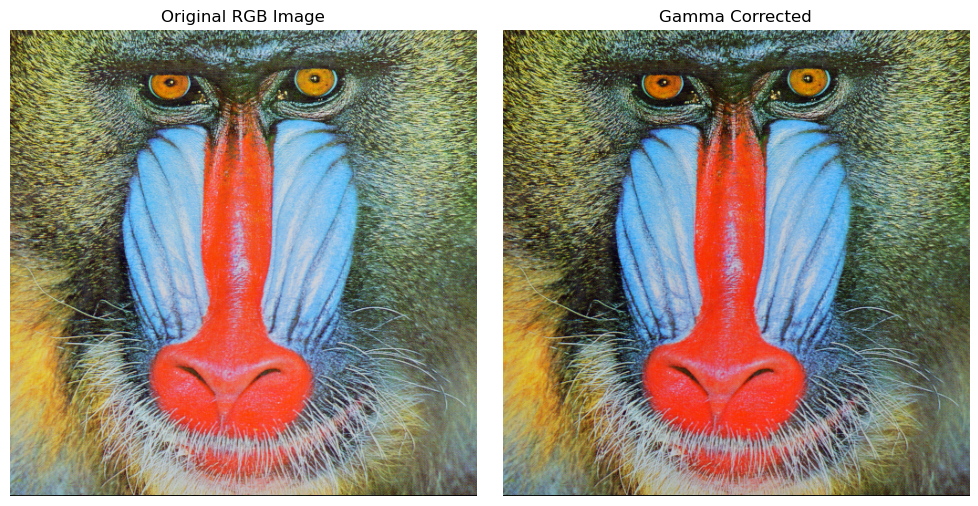

In [12]:
gamma = 1.2  # Gamma value (>1 darkens, <1 brightens)

# Create lookup table for gamma correction
gamma_table = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)]).astype("uint8")

# Apply gamma correction
gamma_adjusted = cv2.LUT(image, gamma_table)

# Show results
plot_image(image, gamma_adjusted, "Original RGB Image", "Gamma Corrected")

#### Perform histogram equalization on each channel.

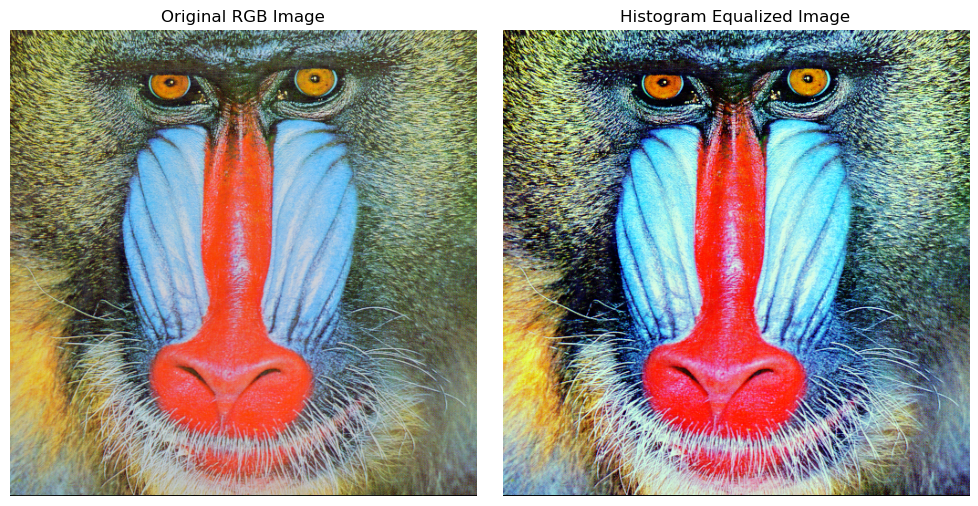

In [13]:
equalized_channels = []
for i in range(3):
    equalized = cv2.equalizeHist(image[:,:,i])
    equalized_channels.append(equalized)

# Merge channels back
image_equalized = cv2.merge(equalized_channels)

# Display comparison
plot_image(image, image_equalized, "Original RGB Image", "Histogram Equalized Image")

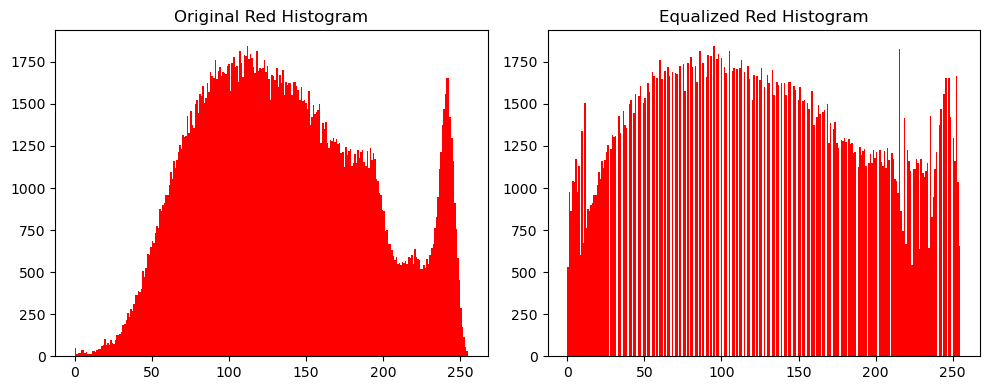

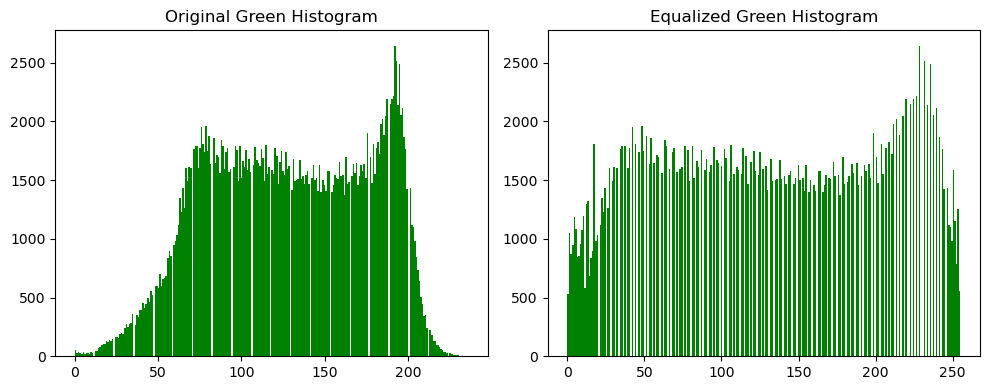

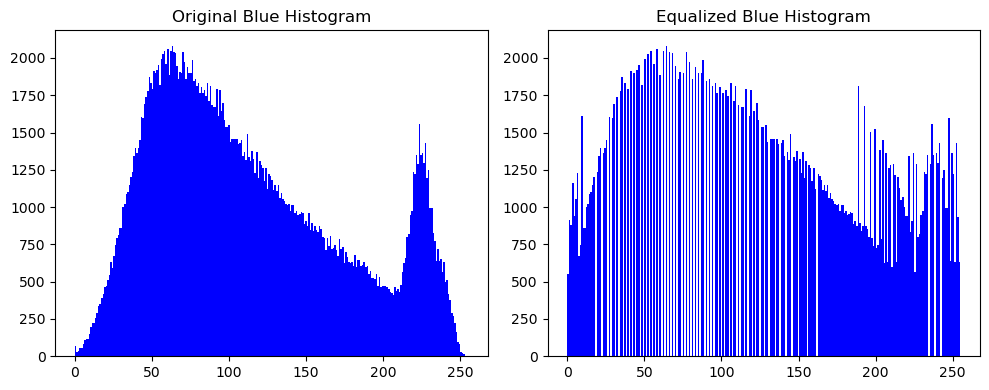

In [14]:
for i, color in enumerate(channels):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(image[:,:,i].ravel(), bins=256, color=color.lower())
    plt.title(f'Original {color} Histogram')
    plt.subplot(1,2,2)
    plt.hist(equalized_channels[i].ravel(), bins=256, color=color.lower())
    plt.title(f'Equalized {color} Histogram')
    plt.tight_layout()
    plt.show()

#### Convert the image to grayscale and create its histogram.

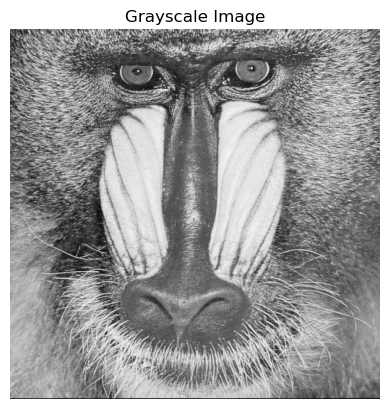

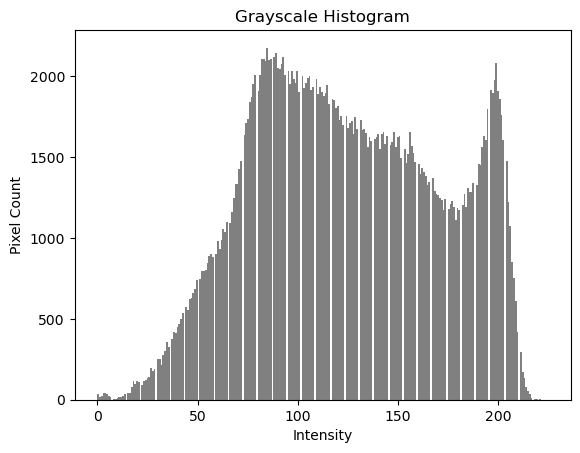

In [15]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Show histogram
plt.hist(gray_image.ravel(), bins=256, color='gray')
plt.title("Grayscale Histogram")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")
plt.show()

#### Apply Otsu’s thresholding to segment objects from the grayscale image.

In [16]:
def thresholding(gray_image, threshold, max_value, min_value):
    N, M = gray_image.shape
    image_out = np.zeros((N, M), dtype=np.uint8)
    for i in range(N):
        for j in range(M):
            if gray_image[i, j] > threshold:
                image_out[i, j] = max_value
            else:
                image_out[i, j] = min_value
    return image_out

In [17]:
threshold = 1
max_value = 255
min_value = 0

threshold_image = thresholding(gray_image, threshold, max_value, min_value)
threshold_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

#### Display results:
* Show original and transformed images side-by-side for each operation.
* Include histograms where applicable.


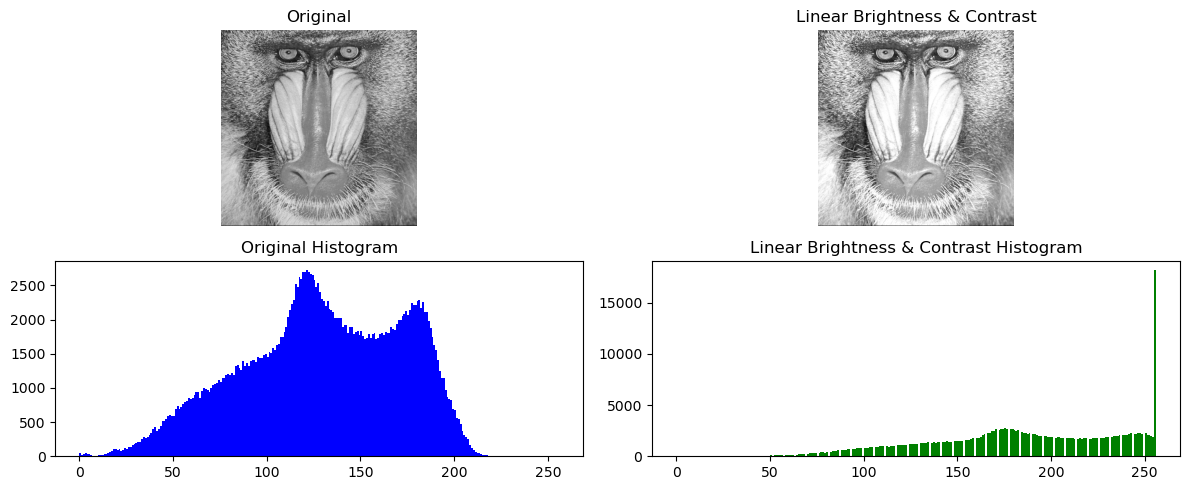

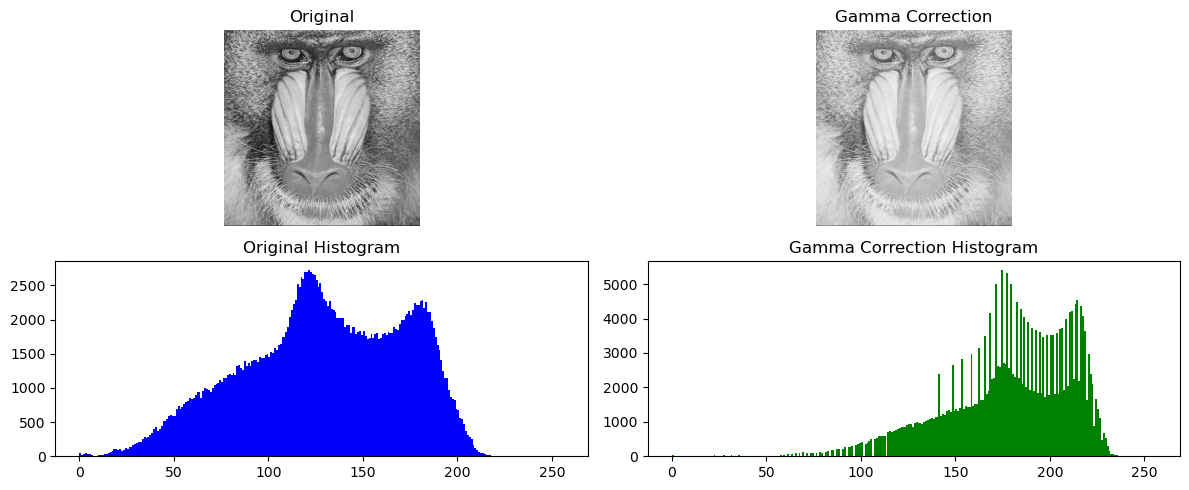

In [23]:
# Load an image (grayscale)
image = cv2.imread('baboon.png', cv2.IMREAD_GRAYSCALE)

# Linear brightness and contrast adjustment
alpha = 1.2  # Contrast control (1.0-3.0)
beta = 30    # Brightness control (0-100)
linear_adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Gamma correction adjustment
gamma = 0.5
gamma_adjusted = np.array(255*(image / 255) ** gamma, dtype='uint8')

# Now call the plotting function
plot_image_and_histogram(image, linear_adjusted, "Original", "Linear Brightness & Contrast")
plot_image_and_histogram(image, gamma_adjusted, "Original", "Gamma Correction")